<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/16_ML__NeuralNetwork_CNN_NIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extend Digits network to hhandwritten characters 

Use NIST dataset: EMNIST Letters: 145,600 characters. 26 balanced classes.
https://www.nist.gov/itl/products-and-services/emnist-dataset

* Play with NN configurations -- number of layers, ssize of layers
* Please try to break it
* Throw in some random noise 
* Replace tangent with another function (logit/ sigmioid???)

In [1]:
# Data Basic
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="white")

In [2]:
from google.colab import drive
drive.mount("/content/drive")
data_dir = "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"

Mounted at /content/drive


In [3]:
import sys
sys.path.append(data_dir)
#import util from the that we made last times
from neuralnetwork_util import Network, FCLayer, ActivationLayer, FCLayer, ActivationLayer, mse, mse_prime

# Loading Data

In [33]:
train = pd.read_csv(data_dir + '/emnist-letters-train.csv')
test = pd.read_csv(data_dir + '/emnist-letters-test.csv')
print(train.shape)
print(test.shape)

(88799, 785)
(14799, 785)


## Reshape Data

In [35]:
#training_letters
y1 = np.array(train.iloc[:,0].values)
x1 = np.array(train.iloc[:,1:].values)
#testing_labels
y2 = np.array(test.iloc[:,0].values)
x2 = np.array(test.iloc[:,1:].values)
print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(88799, 784) (88799,)
(14799, 784) (14799,)


In [16]:
np.unique(y2)

array([0., 1.], dtype=float32)

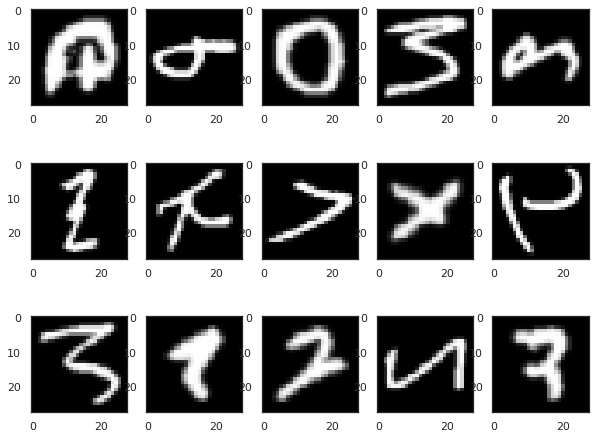

In [9]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]),cmap='gray')

# Normalization

In [10]:
import tensorflow as tf

In [11]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [36]:
# Transform labels
# According to Documents
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

# CNN Classification

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split

In [38]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [39]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [40]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#Callback API's to save best weights and change learning rate

In [41]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [42]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.8232
Epoch 1: val_accuracy improved from -inf to 0.89369, saving model to Best_points.h5
2220/2220 [==============================] - 126s 56ms/step - loss: 0.5636 - accuracy: 0.8232 - val_loss: 0.3327 - val_accuracy: 0.8937 - lr: 0.0010
Epoch 2/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2814 - accuracy: 0.9091
Epoch 2: val_accuracy improved from 0.89369 to 0.89735, saving model to Best_points.h5
2220/2220 [==============================] - 130s 58ms/step - loss: 0.2814 - accuracy: 0.9091 - val_loss: 0.3228 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9258
Epoch 3: val_accuracy improved from 0.89735 to 0.90298, saving model to Best_points.h5
2220/2220 [==============================] - 118s 53ms/step - loss: 0.2226 - accuracy: 0.9258 - val_loss: 0.3192 - val_accuracy: 0.9030 - lr: 0.0010
E

# Plot Accuracy to Evaluate Model

Text(0, 0.5, 'Accuray')

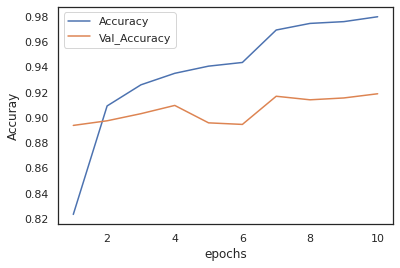

In [44]:
import seaborn as sns

q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

# Adjust Layers by Tensorflow
https://www.tensorflow.org/api_docs/python/tf/keras/activations

- Changed the middle activation functions from relu to tanh

- Changed the final activation function from softmax to sigmoid.

In [45]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(number_of_classes,activation='sigmoid')
])

In [46]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.8194
Epoch 1: val_accuracy improved from -inf to 0.88243, saving model to Best_points.h5
2220/2220 [==============================] - 117s 52ms/step - loss: 0.5961 - accuracy: 0.8195 - val_loss: 0.3721 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2974 - accuracy: 0.9016
Epoch 2: val_accuracy improved from 0.88243 to 0.89307, saving model to Best_points.h5
2220/2220 [==============================] - 114s 52ms/step - loss: 0.2974 - accuracy: 0.9016 - val_loss: 0.3277 - val_accuracy: 0.8931 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.9239
Epoch 3: val_accuracy improved from 0.89307 to 0.90845, saving model to Best_points.h5
2220/2220 [==============================] - 115s 52ms/step - loss: 0.2238 - accuracy: 0.9239 - val_loss: 0.2913 - val_accuracy: 0.9084 - lr: 0.0010
E